# Part I - Ford GoBike System Data
## by Eniola Sofiyah Elemide

## Introduction
> The dataset contains information about **183412** ride details that occured in 2019, collected from Ford GoBike System. The dataset contains **16 columns** with gives the details about each ride. Each column is described below:
    <ol>
    <li><strong>duration_sec</strong>: Trip duration in seconds</li>
    <li><strong>start_time</strong>: Time the trip started</li>
    <li><strong>end_time</strong>: Time the trip ended</li> 
    <li><strong>start_station_id</strong>: Unique number assigned to the start station</li>
    <li><strong>start_station_name</strong>: Name of the start station</li>
    <li><strong>start_station_latitude</strong>: Latitude of start station</li>
    <li><strong>start_station_longitude</strong>: Longitude of start station</li>
    <li><strong>end_station_id</strong>: Unique number assigned to the end station</li>
    <li><strong>end_station_name</strong>: Name of the end station</li>
    <li><strong>end_station_latitude</strong>: Latitude of end station</li>
    <li><strong>end_station_longitude</strong>: Longitude of end station</li>
    <li><strong>bike_id</strong>: Unique number asigned to the bike used</li>
    <li><strong>user_type</strong>: Whether user is a one off customer or a subscriber</li>
    <li><strong>member_birth_year</strong>: User year of birth</li>
    <li><strong>member_gender</strong>: User gender</li>
    <li><strong>bike_share_for_all_trip</strong></li>
    </ol>



## Preliminary Wrangling
I'll begin the exploration of a dataset containing duration and details for 183421 bike trips in the year 2019.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset into a dataframe
bike = pd.read_csv('201902-fordgobike-tripdata.csv')

# check if the data is properly loaded
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# print the structure of the dataset
print(bike.shape)
# print the datatypes of the variables in the dataset
print(bike.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
# check for duplicated rows
bike.duplicated().sum()

0

In [5]:
# check the statistical summary of the data
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


# Data Cleaning 
## Issues
1. Improper datatypes for start_time and end_time columns
2. Impossible values in the member_birth_year column(<1920)
3. Multiple variables in the start_time and end_time columns
4. Missing values in gender column

### Define 
Convert start_time and end_time columns to the proper datatype(datetime columns)

### Code 

In [6]:
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

### Test

In [7]:
print('The datatype of start_time column is {}'.format(bike['start_time'].dtype))
print('The datatype of end_time column is {}'.format(bike['end_time'].dtype))

The datatype of start_time column is datetime64[ns]
The datatype of end_time column is datetime64[ns]


### Define 
Extract the days and months variables from start_time and end_time column

### Code

In [8]:
# extract the variables(date, hour, day and month) from the start_time column
bike['start_date'] = pd.to_datetime(bike['start_time']).dt.date 
bike['start_clock'] = pd.to_datetime(bike['start_time']).dt.strftime('%H:%M')
bike['start_day'] = pd.to_datetime(bike['start_time']).dt.day_name()
bike['start_month'] = pd.to_datetime(bike['start_time']).dt.strftime('%B')

# extract from the end_time column
bike['end_date'] = pd.to_datetime(bike['end_time']).dt.date
bike['end_clock'] = pd.to_datetime(bike['end_time']).dt.strftime('%H:%M')
bike['end_day'] = pd.to_datetime(bike['end_time']).dt.day_name()
bike['end_month'] = pd.to_datetime(bike['end_time']).dt.strftime('%B')

### Test

In [9]:
print(bike.info())

# confirm that the columns are created with proper values
bike.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_date,start_clock,start_day,start_month,end_date,end_clock,end_day,end_month
36116,353,2019-02-23 16:58:08.753,2019-02-23 17:04:01.866,196.0,Grand Ave at Perkins St,37.808894,-122.25646,183.0,Telegraph Ave at 19th St,37.808702,...,Male,No,2019-02-23,16:58,Saturday,February,2019-02-23,17:04,Saturday,February


### Define 
Replace impossible values in the member_birth_year column; values less than 1910 are considered impossible because riders that are over 100 years are too old to ride a bike.

**Note: Oldest person to ride a bike was 105 years according to google**

### Code

In [10]:
# replace values less than 1910 with mean of the variable
bike.loc[bike['member_birth_year'] < 1910, 'member_birth_year'] = bike['member_birth_year'].mean()

### Test

In [11]:
# check the statistics for the minimum year
bike['member_birth_year'].describe()

count    175147.000000
mean       1984.840781
std           9.971632
min        1910.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

### Define
Replace missing values in member_gender column with 'Other'

### Code

In [12]:
bike['member_gender'].replace(np.nan, 'Other', inplace = True)

### Test

In [13]:
bike['member_gender'].isna().sum()

0

**Create a time_of_day column that contains categorical values values: Morning, Afternoon, Evening and Night**

In [14]:
# get the hour before the colon and minutes form the start hour
bike['start_hour'] = bike['start_clock'].str.split(':').str[0]
# convert the extracted hour to an integer
bike['start_hour'] = bike['start_hour'].astype('int')

# get the hour before the colon and minutes form the start hour
bike['end_hour'] = bike['end_clock'].str.split(':').str[0]
bike['end_hour'] = bike['end_hour'].astype('int')

In [15]:
# create a function to divide the hours into parts of the day
def time_of_day(dataframe):

    '''
    create a modified dataframe that contains important columns
    
    Parameters:
    dataframe: Dataframe to modify
    
    Variables:
    start_time_day: a list containing start time grouped into categories
    end_time_day: a list containing end time grouped into categories
    
    Returns:
    A new dataframe to perform operation on 
    '''
    df = dataframe.copy()
    
    start_time_of_day = []
    for row in df['start_hour']:
        if row >= 5 and row <= 11:
            start_time_of_day.append('Morning')
        elif row >= 12 and row <= 16:
            start_time_of_day.append('Afternoon')
        elif row >= 17 and row <= 20:
            start_time_of_day.append('Evening')
        else:
            start_time_of_day.append('Night')
    
    df['start_time_of_day'] = start_time_of_day
    
    end_time_of_day = []
    for row in df['end_hour']:
        if row >= 5 and row <= 11:
            end_time_of_day.append('Morning')
        elif row >= 12 and row <= 16:
            end_time_of_day.append('Afternoon')
        elif row >= 17 and row <= 20:
            end_time_of_day.append('Evening')
        else:
            end_time_of_day.append('Night')
            
    df['end_time_of_day'] = end_time_of_day
    
    return df

In [16]:
# create an elaborate dataset
bike_cp = time_of_day(bike)

In [17]:
# check if the dataframe has all necessary columns and values
bike_cp.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_day,start_month,end_date,end_clock,end_day,end_month,start_hour,end_hour,start_time_of_day,end_time_of_day
69301,471,2019-02-19 19:47:16.780,2019-02-19 19:55:08.526,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,129.0,Harrison St at 20th St,37.758862,...,Tuesday,February,2019-02-19,19:55,Tuesday,February,19,19,Evening,Evening
119546,871,2019-02-11 17:39:45.928,2019-02-11 17:54:17.737,61.0,Howard St at 8th St,37.776513,-122.411306,144.0,Precita Park,37.747300,...,Monday,February,2019-02-11,17:54,Monday,February,17,17,Evening,Evening
120957,1368,2019-02-11 16:08:37.285,2019-02-11 16:31:25.586,52.0,McAllister St at Baker St,37.777416,-122.441838,323.0,Broadway at Kearny,37.798014,...,Monday,February,2019-02-11,16:31,Monday,February,16,16,Afternoon,Afternoon
60,401,2019-02-28 23:28:53.508,2019-02-28 23:35:34.926,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,240.0,Haste St at Telegraph Ave,37.866043,...,Thursday,February,2019-02-28,23:35,Thursday,February,23,23,Night,Night
6396,980,2019-02-28 10:11:57.313,2019-02-28 10:28:18.041,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,324.0,Union Square (Powell St at Post St),37.788300,...,Thursday,February,2019-02-28,10:28,Thursday,February,10,10,Morning,Morning


In [18]:
# final shape of the dataset
print('Shape of the dataset is:', bike_cp.shape)
print('------------------------------------------------------------')
# information about the columns
bike_cp.info()

Shape of the dataset is: (183412, 28)
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null 

### What is the structure of your dataset?

> The dataset contains 183412 records and originally 16 columns 7 of which are object or string variables, 2 integer variables and 7 float variables. But after data cleaning, the dataset now has 28 columns;

> 1. datetime64 - 2 features.
2. float64 - 7 features.
3. int32 - 2 features.
4. int64 - 2 features.
5. object - 15 features.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in determining the features that best predicts the duration_sec variable in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age can be a factor that affects the duration of a trip. Also the user_type along with the station id and gender can determime the duration of the trip.

# Univariate Exploration

> In this section, I'll investigate distributions of individual variables.
 


In [19]:
# create a function that annotates on each bar in a plot
def annot_pct(a, b):
    '''
    create annotations on bars in a plot
    
    Parameters:
    a: value counts of a variable
    b: sum of the count of each value in a variable
    
    Returns:
    annotations in percentage on each bar in a plot
    '''
    locs, labels = plt.xticks() 

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = a[label.get_text()]
        string_per = '{:0.1f}%'.format(100*count/b)

        # print the annotation just below the top of the bar
        ans = plt.text(loc, count+2, string_per, ha = 'center', color = 'black')
    return ans

### Question
Is there any observation I can make from the distribution of the variable. I'll begin by analyzing the distribution of the main variable of interest whcih is duration_sec.

### Visualization

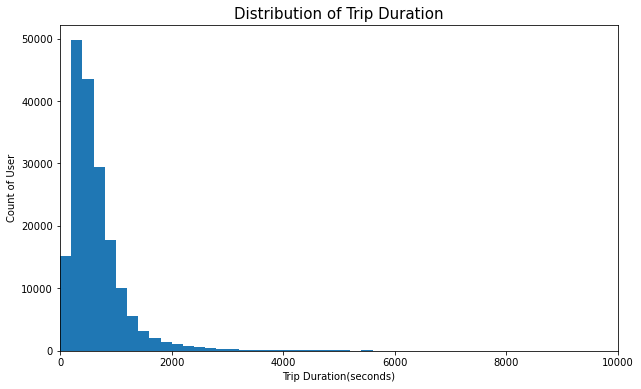

In [20]:
bins = np.arange(0, bike_cp['duration_sec'].max()+200, 200)
plt.figure(figsize=(10,6))
plt.hist(data = bike_cp, x = 'duration_sec', bins = bins);
plt.xlim([0,10000])
plt.title('Distribution of Trip Duration', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Trip Duration(seconds)");

**Since the distribution is skewed to the right,I'll put it on a log scale to get further insight**

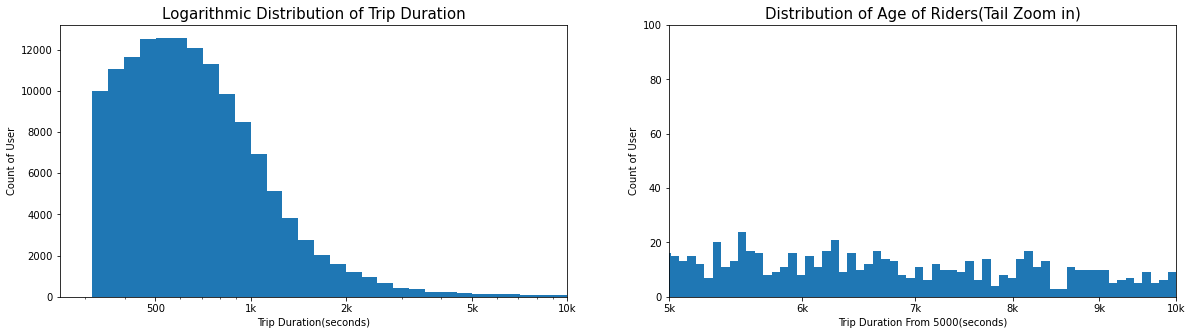

In [21]:
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
bins = 10 ** np.arange(2.5, np.log10(bike_cp['duration_sec'].max())+0.05, 0.05)
plt.hist(data = bike_cp, x = 'duration_sec', bins = bins);
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5], [500, '1k', '2k','5k','10k', '20k','50k', '100k']);
plt.xlim([250, 10000])
plt.title('Logarithmic Distribution of Trip Duration', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Trip Duration(seconds)");

# second plot to spot any outlier in the distribution
plt.subplot(1,2,2)
bins = 10 ** np.arange(2.5, np.log10(bike_cp['duration_sec'].max())+0.005, 0.005)
plt.hist(data = bike_cp, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([5e3, 6e3, 7e3, 8e3, 9e3, 1e4], ['5k','6k','7k','8k','9k','10k'])
plt.xlim([5000, 10000])
plt.ylim([0,100])
plt.title('Distribution of Age of Riders(Tail Zoom in)', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Trip Duration From 5000(seconds)");

### Observation
Duration has a long-tailed distribution, lots of riders have duration of less than 1000 seconds, and few riders took more than 2000 seconds to get to the end station. After plotting on a log-scale, the distribution looks unimodal, with one peak between 500 seconds and 700 seconds and starts to dip without regaining any peak value

The subplot was plotted to see if there are any outlier in the tail of the distribution. There are no ouliers for the next 20k seconds and more.

### Question
I'll visualize the first predictor variable : member_birth_year. How does the age distribution look

### Visualization

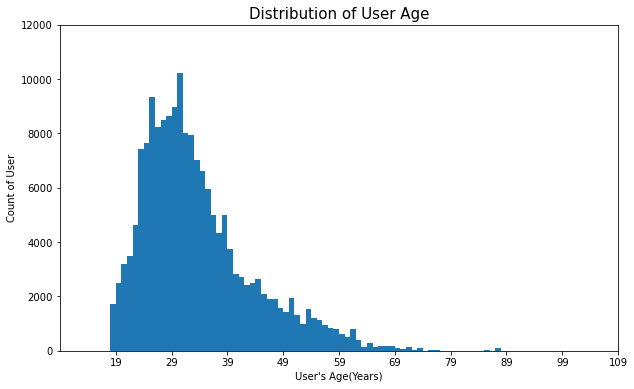

In [22]:
bins = np.arange(0, bike_cp['member_birth_year'].max()+1, 1)

plt.figure(figsize=(10,6))

plt.hist(data = bike_cp.dropna(), x = 'member_birth_year',bins = bins);

plt.axis([2010, 1910, 0, 12000])

years = [2000, 1990, 1980, 1970, 1960, 1950, 1940, 1930, 1920, 1910]
age = []
for year in years:
    i = 2019 - year
    age.append(i)
    
plt.xticks(years, age);

plt.title('Distribution of User Age', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("User's Age(Years)");

### Observation
The distribution is bimodal and slightly skewed to the right. Majority of the distribution is set between the ages 20 and 40.

### Question
I'll visualize the second predictor variable : user_type
### Visualization

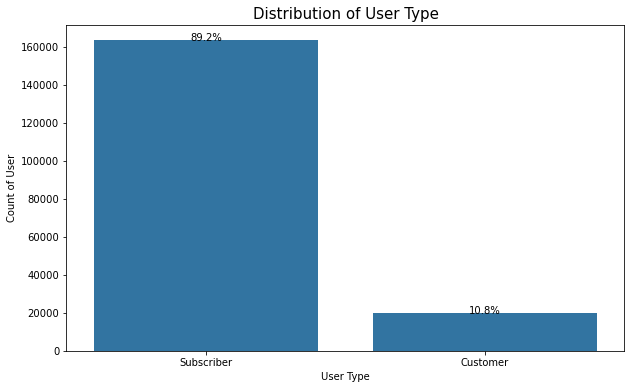

In [23]:
rider_count = bike_cp['user_type'].value_counts()
# get the total of all user_type
total_rider = rider_count.sum()

order = rider_count.index
plt.figure(figsize=(10,6))
sb.countplot(data = bike_cp, x = 'user_type', color = sb.color_palette()[0], order = order);

# call the function to annotate the bars
annot_pct(rider_count, total_rider)

plt.title('Distribution of User Type', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("User Type");

### Observation
The percentage of subscribers is eight times the percentage of non subscribers. The Customer may be users that are trying the bikeshare system for the first time as at the recorded time.

### Question
I'll visualize the third predictor variable: member_gender, to see the distribution in the dataset
### Visualization

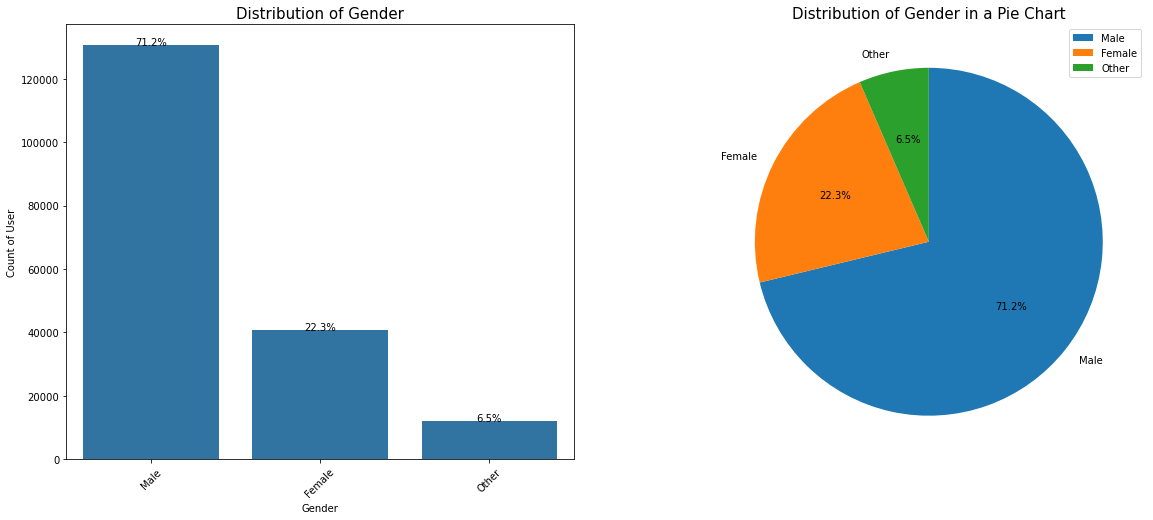

In [24]:
plt.figure(figsize = [20,8])

gender_count = bike_cp['member_gender'].value_counts()
total = gender_count.sum()
order = gender_count.index

# plot the bar chart of the distribution
plt.subplot(1,2,1)
sb.countplot(data = bike_cp, x = 'member_gender', color = sb.color_palette()[0], order = order);

plt.xticks(rotation = 45)
plt.title('Distribution of Gender', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Gender")


# call the function to annotate the bars
annot_pct(gender_count, total)

# plot the pie chart of the distribution
plt.subplot(1,2,2)
plt.pie(gender_count, labels = order, startangle = 90, autopct='%1.1f%%', counterclock = False);
plt.title('Distribution of Gender in a Pie Chart', fontsize = 15)
plt.legend();

### Observation
Women and other gender types are much more less than men

### Question
I'll visualize other variables I think might also help predict the feature of interest. I'll begin with the start  and end station id.
### Visualization

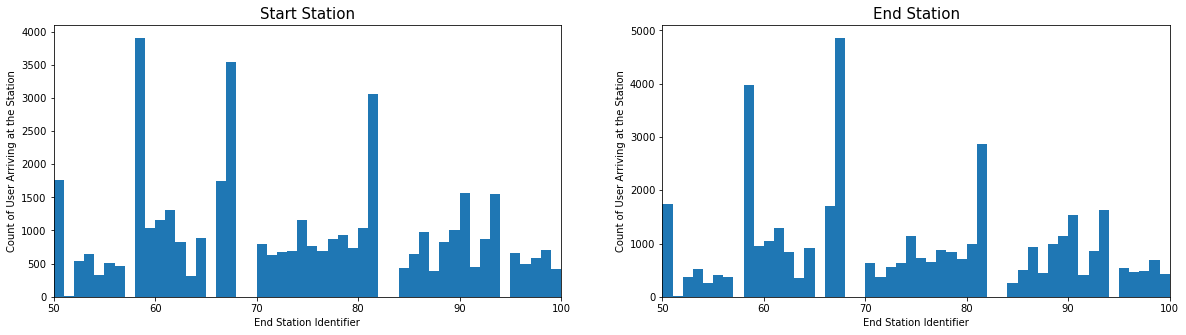

In [25]:
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)

bins = np.arange(0, bike_cp['start_station_id'].max()+1, 1)
plt.hist(data = bike_cp, x = 'start_station_id', bins = bins);
plt.xlim(50,100)
plt.title('Start Station', fontsize = 15)
plt.ylabel('Count of User Arriving at the Station')
plt.xlabel("End Station Identifier");

# plot for end_time 
plt.subplot(1,2,2)
bins = np.arange(0, bike_cp['end_station_id'].max()+1, 1)
plt.hist(data = bike_cp, x = 'end_station_id', bins = bins);
plt.xlim(50,100);
plt.title('End Station', fontsize = 15)
plt.ylabel('Count of User Arriving at the Station')
plt.xlabel("End Station Identifier");

### Observation
Zooming into the Start station with id of 58 is the most popular start station followed by start station with id of 67 while end station with id of 67 is the most popular end station followed by end station with id of 58.

### Question
I'll visualize the 'day' variable to check if it is an important feature to predict duration
### Visualization

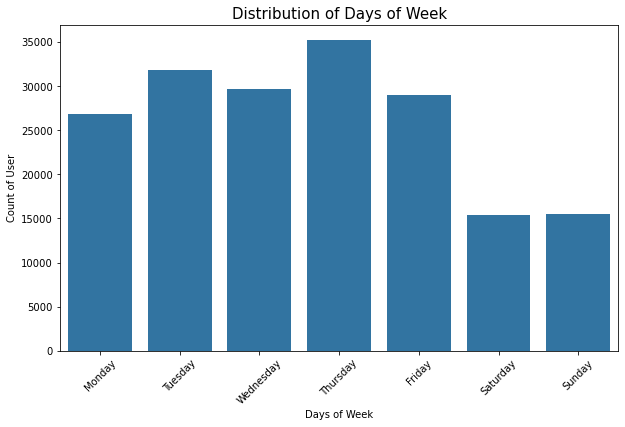

In [26]:
# place the days of the week in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,6))
sb.countplot(data = bike_cp, x = 'start_day', color = sb.color_palette()[0], order = day_order);
plt.xticks(rotation = 45)
plt.title('Distribution of Days of Week', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Days of Week");

### Observation
Thursday is the most popular day riders make use of the bike share system. Sunday and Saturday are the least popular days with almost equal frequencies. This could mean that riders mainly use the bike share system for work or school commute which happens on weekdays. But on weekends most riders stay back home or prefare another mode of transportation.

I notice that there are some records where start and end days are different, meaning the rider did not arrive to the end station on the same day they left the start station. This could be due to many reasons, example, the rider left the start station close to midnight.


I'll plot the distribution for the rides that are not completed the same day that they started.


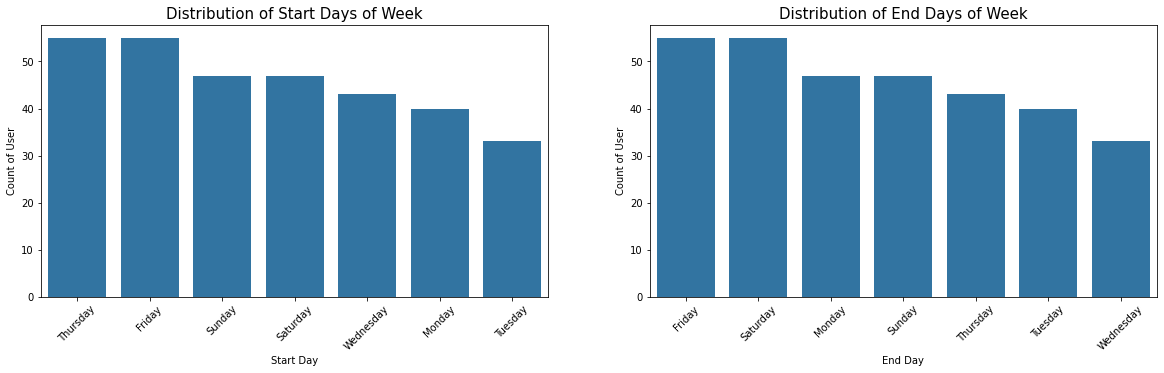

In [27]:
# lets see the records where strat day is not same as end day
over = bike_cp.query('start_day != end_day')

# lets plot the distribution of an overnight ride
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
order = over['start_day'].value_counts().index
sb.countplot(data = over, x = 'start_day', color = sb.color_palette()[0], order = order);
plt.xticks(rotation = 45)
plt.title('Distribution of Start Days of Week', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Start Day");

# plot for rides that didn't get to the end station on the same day
plt.subplot(1,2,2)
order = over['end_day'].value_counts().index
sb.countplot(data = over, x = 'end_day', color = sb.color_palette()[0], order = order);
plt.xticks(rotation = 45)
plt.title('Distribution of End Days of Week', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("End Day");

### Observation
Notice that side by side plot shows the days following each other and having the same frequency, for instance, start_day chart has Thursday as its first bar with the highest frquency and end_day chart has Friday(a day following Thursday) has its first bar with the same frequency as Thursday's bar in start_day chart.


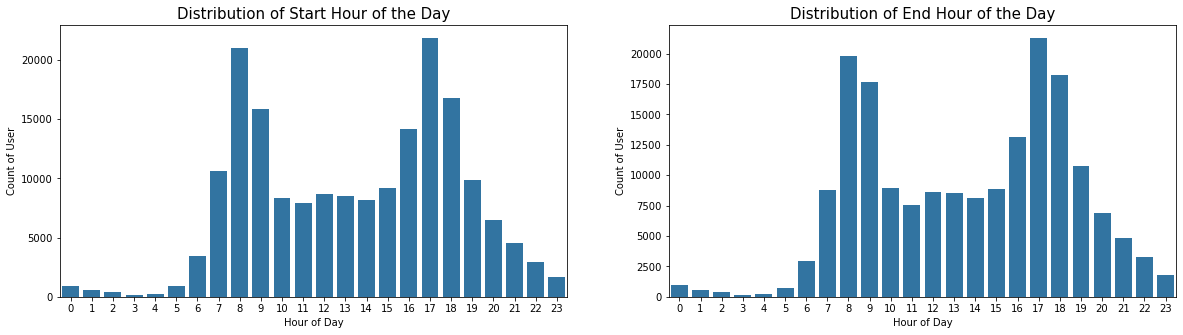

In [28]:
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
# plot start hour of the day
order = bike_cp['start_hour'].value_counts().index
sb.countplot(data = bike_cp, x = 'start_hour', color = sb.color_palette()[0]);

plt.title('Distribution of Start Hour of the Day', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Hour of Day");

# plot for end_hour 
plt.subplot(1,2,2)

sb.countplot(data = bike_cp, x = 'end_hour', color = sb.color_palette()[0])

plt.title('Distribution of End Hour of the Day', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Hour of Day");

### Observation
The charts are bimodal distribution with 8am and 5pm as the most popular start and end times of the day. Notive that both times are Opening time and closing time for work respectively.

### Question
Let's see if we can get any insight on disribution of time_of_day column
### Visualization

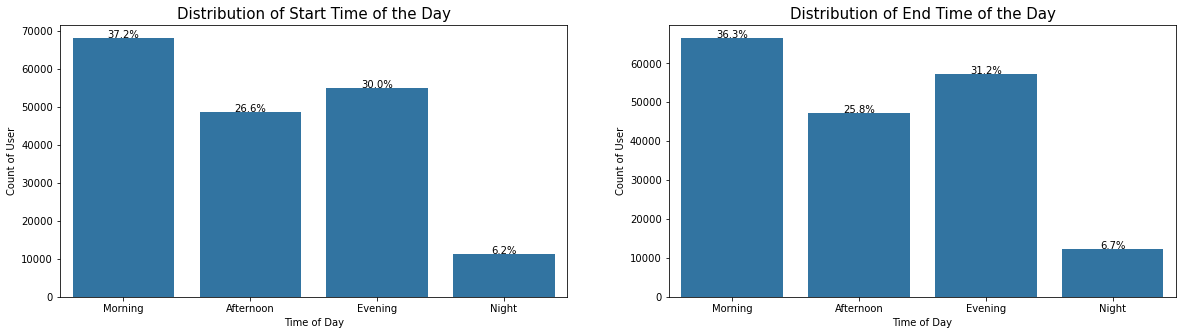

In [29]:
plt.figure(figsize = [20, 5])

time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

plt.subplot(1,2,1)
# plot start time of the day
order = bike_cp['start_time_of_day'].value_counts().index
sb.countplot(data = bike_cp, x = 'start_time_of_day', color = sb.color_palette()[0], order = time_order);


part_count = bike_cp['start_time_of_day'].value_counts()
total_part_count = part_count.sum()

# call the function to annotate the bars
annot_pct(part_count, total_part_count)

plt.title('Distribution of Start Time of the Day', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Time of Day");

# plot for end_time 
plt.subplot(1,2,2)
order = bike_cp['end_time_of_day'].value_counts().index
sb.countplot(data = bike_cp, x = 'end_time_of_day', color = sb.color_palette()[0], order = time_order)

end_part_count = bike_cp['end_time_of_day'].value_counts()
total_end_count = end_part_count.sum()

# call the function to annotate the bars
annot_pct(end_part_count, total_end_count);

plt.title('Distribution of End Time of the Day', fontsize = 15)
plt.ylabel('Count of User')
plt.xlabel("Time of Day");

### Observation
Time of the day on both plots are very identical, meaning most trips started in the morning ends in the morning and so on. Only 1% or less difference.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration has an unexpectedly large amount of values and most of the higher values are towards the tail of the distribution so the best way to understand the data was to put it on log scale. The insight I made was that peak occurs at 600 to 700 seconds then distribution starts to dip and does not regain any more peak value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. Age column was created by subtracting member_birth_year from 2019, within the creation of the visualizations containing 'age' an axis. Other columns created are: time_of_day, start_day and end_day
2. Imposible member_birh_year entry were replaced with the mean of the series.

## Bivariate Exploration

> In this section, I'll investigate relationships between pairs of variables in the
dataset.

### Question
What does the relationship between user's age and trip duration look like?

In [ ]:
# set the age to use on x axis
age = 2019 - bike_cp['member_birth_year']
plt.figure(figsize=(10,6))
sb.regplot(data = bike_cp, x = age.fillna(age.mean()), y = 'duration_sec', scatter_kws={'alpha':1/20});
plt.xlabel('User Age(Year)')
plt.ylabel('Ride Duration(Seconds)')
plt.title('Relationship Between User Age and Ride Duration', fontsize = 15);

Most data fall below the duration of 20000 seconds.  
I'll set the limit on the y-axis to see the distribution clearly.

In [ ]:
plt.figure(figsize = [18, 6])

age = 2019 - bike_cp['member_birth_year']

plt.subplot(1,2,1)

plt.scatter(data = bike_cp, x = age.fillna(age.mean()), y = 'duration_sec', marker = '.', alpha = 0.25)
# set the limit on y axis to zoom into the distribution
plt.ylim([0, 20000])
plt.xlabel('User Age(Year)')
plt.ylabel('Trip Duration(Seconds)')
plt.title('Scatter Plot Relationship Between User Age and Ride Duration', fontsize = 15);

plt.subplot(1,2,2)

bins_x = np.arange(0, age.max()+5, 5)
bins_y = np.arange(0, bike_cp['duration_sec'].max()+50, 1000)

plt.hist2d(data = bike_cp, x = age.fillna(age.mean()), y = 'duration_sec', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.ylim([0, 20000])
plt.xlabel('User Age(Year)')
plt.ylabel('Trip Duration(seconds)')
plt.title('Heatmap Relationship Between User Age and Ride Duration', fontsize = 15);

### Observation
The heatmap shows that most riders age fall within 20 years and 40 years with trip duration not more than 2500 seconds. 

### Question
What is the distribution of average duration by user type ?

### Visualization

In [ ]:
# avg duration vs user_type
plt.figure(figsize=(10,6))
avg = bike_cp['duration_sec']
sb.barplot(data=bike_cp, x='user_type', y=avg, color = sb.color_palette()[0]);
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration(seconds)')
plt.title('Average Trip Duration for User Types', fontsize = 15);

### Observation
Customer have two times the average trip duration than Subscriber has. What could be the reason?, I'll plot an histogram to see the individual distribution of the two values

In [ ]:
# create a dataframe that contains the records on only customers
cust = bike_cp.query("user_type == 'Customer'")
# create a dataframe that contains the records on only subscribers
sub = bike_cp.query("user_type == 'Subscriber'")

plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

# plot each dataframe
plt.hist(cust.duration_sec, bins = bins, label='Customer')
plt.hist(sub.duration_sec, bins = bins, alpha=0.25, label='Subscriber')

plt.legend()
plt.title('Duration Distributions by User Type', fontsize = 15)
plt.xlabel('Trip Duration(seconds)', fontsize = 10);

### Observation
The plot shows that the customer value spreads wide across the duration axis while the subscriber is narrowed to one point.

### Question
What is the distribution of average duration by start day ?

### Visualization

In [ ]:
# avg duration vs days
plt.figure(figsize=(10,6))
sb.barplot(data=bike_cp, x='start_day', y='duration_sec', color = sb.color_palette()[0], order = day_order);
plt.xlabel('Days of the Week')
plt.ylabel('Average Trip Duration(seconds)')
plt.title('Average Trip Duration Per Day', fontsize = 15);
plt.xticks(rotation = 45);

### Observation
Weekends are the days that have higher average trip duration, this could be due to the fact that no one is rushing to their destination and the users took the trip for recreation.

### Question
What is the distribution of average duration by hours of the day?

### Visualization

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
# plot for start hour
sb.barplot(data=bike_cp, x='start_hour', y='duration_sec', color = sb.color_palette()[0]);
plt.xlabel('Time of the Day')
plt.ylabel('Average Trip Duration(seconds)')
plt.title('Average Trip Duration Per Start Time of the Day', fontsize = 15);

plt.subplot(1, 2, 2)
# plot for end hours
sb.barplot(data=bike_cp, x='end_hour', y='duration_sec', color = sb.color_palette()[0]);
plt.xlabel('Time of the Day')
plt.ylabel('Average Trip Duration(seconds)')
plt.title('Average Trip Duration Per End Time of the Day', fontsize = 15);

### Observation
The hours that had highest average trip duration are in the midlle of the night.

### Question
What is the distribution of user_type by day?

### Visualization

In [ ]:
plt.figure(figsize=(10,6))
sb.countplot(data=bike_cp, x='start_day', order=day_order, hue='user_type', palette = 'Blues')
plt.title('Distribution of User Type by Day', fontsize=15)
plt.xlabel('Days of Week')
plt.ylabel('User Count')
plt.legend();

### Question
What is the distribution of user_type by time_of_day?

### Visualization

In [ ]:
plt.figure(figsize=(10,6))
sb.countplot(data=bike_cp, x='start_time_of_day', order=time_order, hue='user_type', palette = 'Blues')
plt.title('Distribution of User Type by Time', fontsize=15)
plt.xlabel('Time of Day')
plt.ylabel('User Count')
plt.legend();

### Observation
Thursday is the most popular day of the week and Mornings are the most frequent start times.

### Question
What is the most popular combination of start station and end station?

### Visualization

In [ ]:
comb = bike_cp.groupby(['start_station_name', 'end_station_name']).size().sort_values(ascending = False)[:10]
comb = comb.reset_index(name = 'count')
comb

### Observation
The most popular combination of start and end station are:

start station: Berry St at 4th St.

end station: San Francisco Ferry Building, with total count of 337 trips.

### Question
What is the average trip duration by gender ?
### Visualization

In [ ]:
plt.figure(figsize=(10,6))
sb.barplot(data=bike_cp, x='member_gender', y='duration_sec', color = sb.color_palette()[0]);
plt.xlabel('User Gender')
plt.ylabel('Average Trip Duration(seconds)')
plt.title('Average Trip Duration by Gender', fontsize = 15);
plt.xticks(rotation = 45);

### Observation
'Other' is the gender that has the highest average trip duration. The reason could be the same as why Customers have higher average trip duration than Subscriber. I'll test the theory 

In [ ]:
# create a dataframe that contains the records on only male users
man = bike_cp.query("member_gender == 'Male'")
# create a dataframe that contains the records on only female users
wmn = bike_cp.query("member_gender == 'Female'")
# create a dataframe that contains the records on only other gender
oth = bike_cp.query("member_gender == 'Other'")

plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

# plot histogram of each dataframe
plt.hist(man.duration_sec, bins = bins, alpha=0.25, label='Male')
plt.hist(wmn.duration_sec, bins = bins, alpha=0.25, label='Female')
plt.hist(oth.duration_sec, bins = bins, label='Other')


plt.legend()
plt.title('Duration Distributions by User Gender', fontsize = 15)
plt.xlabel('Trip Duration(seconds)', fontsize = 10);

Like earlier, 'Other' is widely distributed across the trip duration axis, hence the reason for it's highest average value.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration has dependency on the age of the user. Subscribers have shorter usage times than Customers, same as Other gender compared to Male and Female genders.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Days of the week and user type , Customer remained on the same level throughout the day except at Night.